# **Final Project: MyAnimeList data analysis**
Hung Phan Quoc Viet

# **Introduction and motivation**



Anime, or Japanese animation has been so far the most popular animation films appears on the market. According to [Epic Dope](https://www.epicdope.com/top-10-countries-where-anime-is-most-popular-and-why/), in 2023, the number of anime watchers in US is roughly 168 million people, accounted for nearly 72% of the US population, and also is ranked for top 2 of where anime is most popular. 

Anime has such a big impact like that, with many good, average, bad animes. With that in mind, to talk about the quality of an anime, the best metrics would be how the anime is scored. So how does a score of an anime changes? Which factors exemplify a quality anime? In this notebook, the criterias will be examining the basic metrics that relates to a good anime. 

# **Central question and argument**

To examine how does an anime's score changes, I will look at 5 factors, including the continuous variables: anime's total episodes, the popularity, and the rank of the anime. The categorical variables including where does the story plot comes from, and what is the type of anime is that (e.g. TV series, OVA, Music videos, etc.)

The question here is: Is there any relationship between anime's score with these variables, specifically, how does the correlation and causation relationship looks like between score, and the discussed variables?

# **Outline**
1. Import libraries
2. Load the data
3. Data cleaning
4. Exploratory Data Analysis
 * 4.1. Check the packaging
 * 4.2. Look at the top and bottom of data
 * 4.3. Check the "n"s
 * 4.4. Univariate visualizations
 * 4.5. Simple testing
 * 4.6. Bivariate visualizations
 * 4.7. Conclusion from EDA
5. Inferential Analysis
 * 5.1. No auto-correlation soluion
 * 5.2. Auto-correlation fixed
 * 5.3. Performance conclusion
6. Conclusion

# **1. Import libraries**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd

pd.options.display.max_columns = 200

import statsmodels.formula.api as smf
import statsmodels.api as sm

# **2. Load the data**

We will import the anime dataset from [Kaggle](https://www.kaggle.com/datasets/azathoth42/myanimelist), using animelist.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS 2500/Final Project/data/animelist.csv')

In [ ]:
df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [ ]:
df.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

Fortunately, the dataset contained the required variables, specifically:

- `score` : the target variable we are looking at

Numerous, continuous variables:

- `ranking` : the rank of the anime
- `popularity` : the popularity ranking of the anime
- `episodes` : number of episodes of the anime

Categorical variables:
- `type` : the type of an anime, whether it is TV, Movie, OVA or something else
- `source` : source of the anime, wheter the plot is from manga or original plot or something else

# **3. Data cleaning**

How many columns in the dataset?

In [ ]:
len(df.columns)

31

Since there are 31 columns, it would be easier to filter out the columns that we are going to do analysis on, also the anime title, anime id

In [ ]:
col = ['anime_id','title', 'source', 'type', 'rank', 'episodes', 'popularity', 'score']

Filter the dataset and check head and tail

In [ ]:
df_filtered = df[col]
df_filtered.head()

,anime_id,title,source,type,rank,episodes,popularity,score
0,11013,Inu x Boku SS,Manga,TV,1274.0,12,231,7.63
1,2104,Seto no Hanayome,Manga,TV,727.0,26,366,7.89
2,5262,Shugo Chara!! Doki,Manga,TV,1508.0,51,1173,7.55
3,721,Princess Tutu,Original,TV,307.0,38,916,8.21
4,12365,Bakuman. 3rd Season,Manga,TV,50.0,25,426,8.67


In [ ]:
df_filtered.tail()

,anime_id,title,source,type,rank,episodes,popularity,score
14473,26089,Gutchonpa Omoshiro Hanashi,Unknown,TV,10337.0,5,13598,5.50
14474,21525,Geba Geba Shou Time!,Unknown,OVA,10236.0,1,13284,4.60
14475,37897,Godzilla: Hoshi wo Kuu Mono,Other,Movie,NaN,1,7226,0.00
14476,34193,Nippon Mukashibanashi: Sannen Netarou,Other,OVA,11557.0,1,14334,6.00
14477,37908,Senjou no Valkyria Special,Unknown,Special,12056.0,1,9767,5.15


Check data type 

In [ ]:
df_filtered.dtypes

anime_id        int64
title          object
source         object
type           object
rank          float64
episodes        int64
popularity      int64
score         float64
dtype: object

Check for null values in the dataset

In [ ]:
df_filtered.isna().sum()

anime_id         0
title            0
source           0
type             0
rank          1574
episodes         0
popularity       0
score            0
dtype: int64

The `rank` has 1574 missing values, and as the fact that these values are unique, and by doing imputation would create biases in the data, so dropping would be the optimal way.

In [ ]:
df_filtered = df_filtered.dropna(subset=['rank'])

# **4. Exploratory Data Analysis**

In this part, the goal is to be able to identify the correlation between `score`, with `rank`, `popularity`, `episodes`, `type`, `source`. The main approach for this part would be visualizations and statistical testings.

## **4.1. Check the packaging**

In [ ]:
print("Shape: " + str(df_filtered.shape))
df_filtered.info()

Shape: (12904, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12904 entries, 0 to 14477
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    12904 non-null  int64  
 1   title       12904 non-null  object 
 2   source      12904 non-null  object 
 3   type        12904 non-null  object 
 4   rank        12904 non-null  float64
 5   episodes    12904 non-null  int64  
 6   popularity  12904 non-null  int64  
 7   score       12904 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 907.3+ KB


Check null values

In [ ]:
df_filtered.isna().sum()

anime_id      0
title         0
source        0
type          0
rank          0
episodes      0
popularity    0
score         0
dtype: int64

## **4.2. Look at the top and the bottom of data**

In [ ]:
df_filtered.head()

,anime_id,title,source,type,rank,episodes,popularity,score
0,11013,Inu x Boku SS,Manga,TV,1274.0,12,231,7.63
1,2104,Seto no Hanayome,Manga,TV,727.0,26,366,7.89
2,5262,Shugo Chara!! Doki,Manga,TV,1508.0,51,1173,7.55
3,721,Princess Tutu,Original,TV,307.0,38,916,8.21
4,12365,Bakuman. 3rd Season,Manga,TV,50.0,25,426,8.67


In [ ]:
df_filtered.tail()

,anime_id,title,source,type,rank,episodes,popularity,score
14472,35040,Minna no Taabou Konnichiwa,Original,OVA,11329.0,1,14204,6.75
14473,26089,Gutchonpa Omoshiro Hanashi,Unknown,TV,10337.0,5,13598,5.50
14474,21525,Geba Geba Shou Time!,Unknown,OVA,10236.0,1,13284,4.60
14476,34193,Nippon Mukashibanashi: Sannen Netarou,Other,OVA,11557.0,1,14334,6.00
14477,37908,Senjou no Valkyria Special,Unknown,Special,12056.0,1,9767,5.15


## **4.3. Check the "n"s**

In [ ]:
df_filtered.describe()

,anime_id,rank,episodes,popularity,score
count,12904.000000,12904.000000,12904.000000,12904.000000,12904.000000
mean,17481.906851,6439.065406,12.465050,7301.051689,6.295785
std,13040.475003,3720.227608,45.877408,4339.904014,1.168144
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4523.500000,3216.250000,1.000000,3307.000000,5.610000
50%,16008.000000,6441.500000,1.000000,7530.500000,6.420000
75%,30997.250000,9664.000000,12.000000,11182.250000,7.130000
max,37908.000000,12919.000000,1818.000000,14487.000000,10.000000


How many types of anime are there?

In [ ]:
df_filtered['type'].value_counts()

TV         4124
Movie      2535
OVA        2374
Special    1908
ONA        1114
Music       849
Name: type, dtype: int64

How many sources are there, specifically, is the anime get the plot from manga, or anything else?

In [ ]:
df_filtered['source'].value_counts()

Unknown          3924
Original         3166
Manga            2766
Game              573
Light novel       515
Other             392
Novel             335
Visual novel      313
Music             311
4-koma manga      214
Web manga         138
Picture book       94
Book               92
Card game          55
Radio               9
Digital manga       7
Name: source, dtype: int64

Interesting to see is that there are a lot of unknown values here, which if we put that into testing, it would not give an accurate result that satisfies us, but rather increase the biases in the data. So it is better to drop those unknown values.

In [ ]:
temp = df_filtered[df_filtered['source'] == 'Unknown'].index
temp
df_filtered.drop(index = temp, inplace = True)
df_filtered['source'].value_counts()

Original         3166
Manga            2766
Game              573
Light novel       515
Other             392
Novel             335
Visual novel      313
Music             311
4-koma manga      214
Web manga         138
Picture book       94
Book               92
Card game          55
Radio               9
Digital manga       7
Name: source, dtype: int64

Are all ranks and popularity values unique?

In [ ]:
df_filtered['rank'].value_counts()

0.0        6
3012.0     4
5317.0     4
6303.0     3
6264.0     3
          ..
11947.0    1
12521.0    1
4659.0     1
6082.0     1
11091.0    1
Name: rank, Length: 7727, dtype: int64

In [ ]:
df_filtered['popularity'].value_counts()

0        6
2269     3
10640    3
1881     3
5120     3
        ..
10513    1
5848     1
377      1
2178     1
14345    1
Name: popularity, Length: 7877, dtype: int64

We can see that there are some tied ranks and popularity, however the count is not significant.

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8980 entries, 0 to 14476
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    8980 non-null   int64  
 1   title       8980 non-null   object 
 2   source      8980 non-null   object 
 3   type        8980 non-null   object 
 4   rank        8980 non-null   float64
 5   episodes    8980 non-null   int64  
 6   popularity  8980 non-null   int64  
 7   score       8980 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 631.4+ KB


## **4.4. Univariate Visualizations**

The goal in this part is look at each variables individually, to examine the distributions, the count, etc. However, `rank` and `popularity` will not be inspected, as they are numerous variables, and mostly unique in the dataset.

How does the score distributed?

Text(0, 0.5, 'Counts')

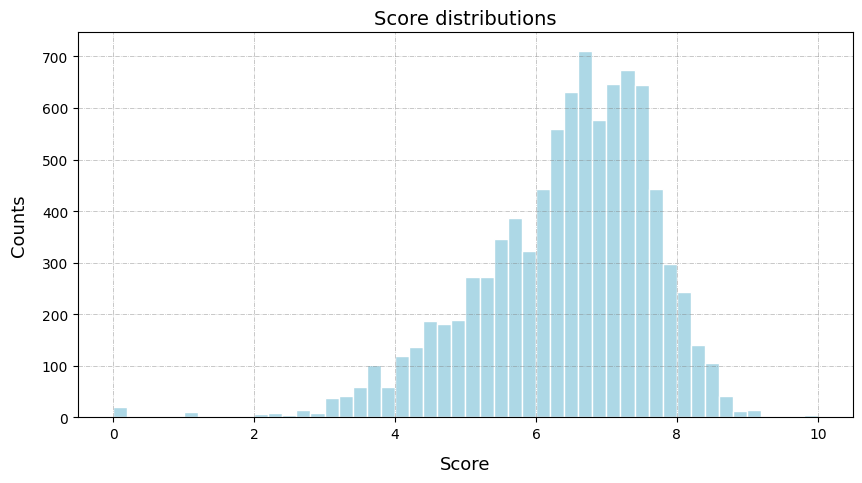

In [ ]:
plt.figure(figsize = (10,5))
plt.hist(df_filtered['score'], bins = 50, histtype = 'bar', color = 'lightblue', ec = 'white')
plt.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

plt.title('Score distributions', fontsize = 14)
plt.xlabel('Score',fontsize = 13, labelpad = 10)
plt.ylabel('Counts',fontsize = 13, labelpad = 10)

How type and source counts look like visually?

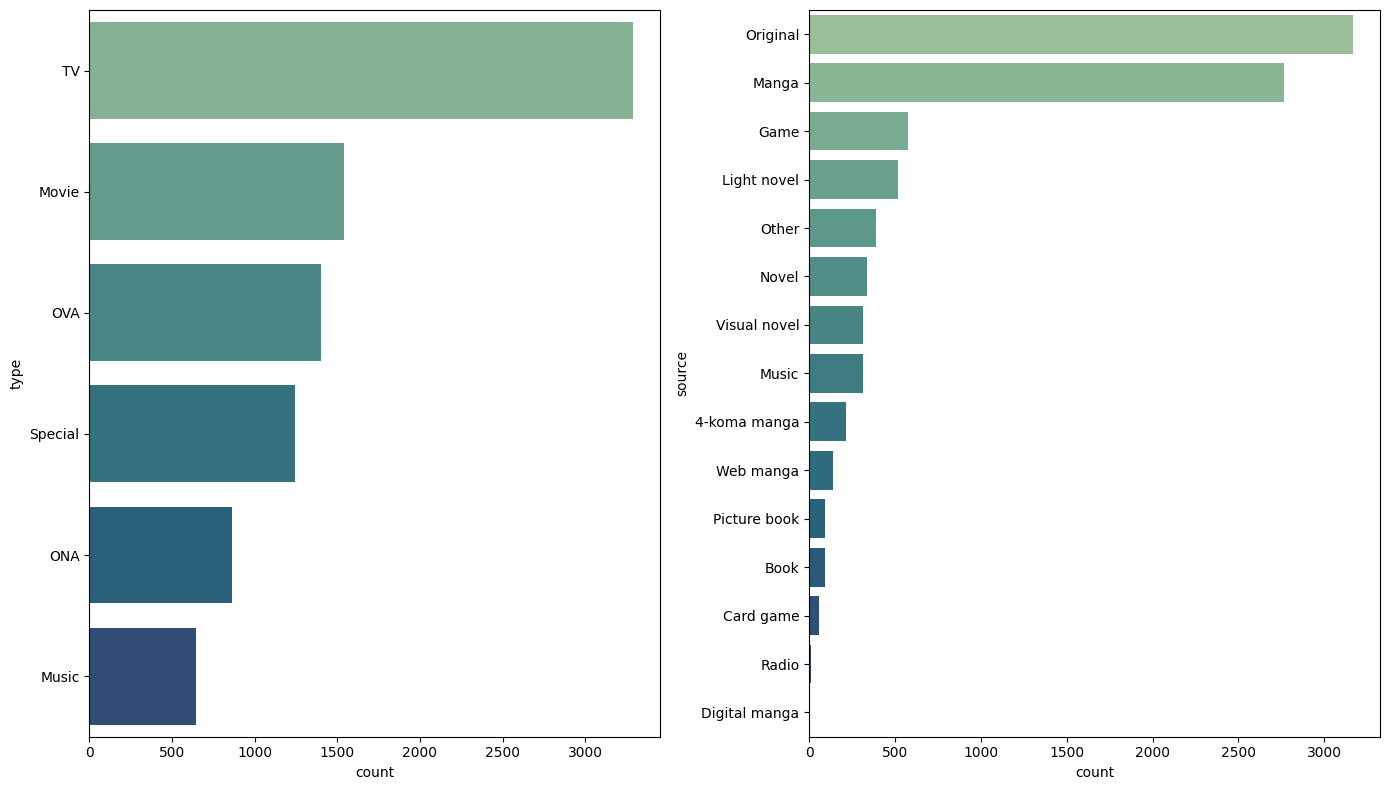

In [ ]:
f,axs = plt.subplots(1,2,figsize=(14,8))
cate_cols = ['type', 'source']
for i,ax in enumerate(axs.flatten()):
    # Plot the data
    sb.countplot(data=df_filtered, y=cate_cols[i],ax=ax, palette = "crest", order = df_filtered[cate_cols[i]].value_counts().index)
  
plt.tight_layout()
images_dir = '/content/drive/MyDrive/DS 2500/Final Project/results'
plt.savefig(f"{images_dir}/cat_count.jpg")

## **4.5. Simple testing**

Let's get to the first part of the question: "Is there any correlation between scores with continuous variables, `rank`, `popularity`, `episodes` and categorical variables, `type` and `source`?

In [ ]:
# Import some libraries for testing
# pearson correlation coefficient for testing score with rank, popularity and episodes
# anova for score against type and source

from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

First, let's examine the `score` with `rank`, `popularity`, `episodes` by using Pearson's correlation coefficient test.

In [ ]:
con_cols = ['rank', 'popularity','episodes']

for i in con_cols:
  r, p_value = pearsonr(df_filtered[i], df_filtered['score'])
  print("{} against score:".format(i))
  print('Correlation: {}'.format(r))
  print("P value: {}".format(p_value))
  print("")

rank against score:
Correlation: -0.8408879546529529
P value: 0.0

popularity against score:
Correlation: -0.7464144769017501
P value: 0.0

episodes against score:
Correlation: 0.11546623707857588
P value: 4.923739841775676e-28



Looking at the corellation and p-value for each correlation test, it is seen that `rank` and `popularity` variables are the most statiscally correlated to `score`

Contradict to that, `episodes` does not have a high correlation score, however, its p-value shows a statistically significant relationship between these 2 variables. Therefore, although there is a weak correlation between two variables, however the correlation is statistically significant and cannot be ignored.

Second, examine the `score` with `type` and `source` by ANOVA test.

In [ ]:
# ANOVA test performed using statsmodel
# score against type
model = ols('score ~ C(type)', data = df_filtered).fit()
result = sm.stats.anova_lm(model, typ = 2)

# score against type
model2 = ols('score ~ C(source)', data = df_filtered).fit()
result2 = sm.stats.anova_lm(model2, typ = 2)

print("score in relation to type")
print(result)
print("")
print("score in relation to source")
print(result2)

score in relation to type
                sum_sq      df           F  PR(>F)
C(type)    2591.565969     5.0  405.766742     0.0
Residual  11463.094718  8974.0         NaN     NaN

score in relation to source
                 sum_sq      df           F  PR(>F)
C(source)   3041.528843    14.0  176.849306     0.0
Residual   11013.131844  8965.0         NaN     NaN


From the result of F-statistics and p-value of both models, there is a statistical significance and difference for the score depends on which `type` and `source` we input in.

## **4.6.Bivariate Visualizations**

In this part, the goal is to take a closer look into how each variable correlates with the target variable, further than that we also take a look at how the continuous variables relates to each other, for further causation analysis.

How does each numerical variable correlates with each other?

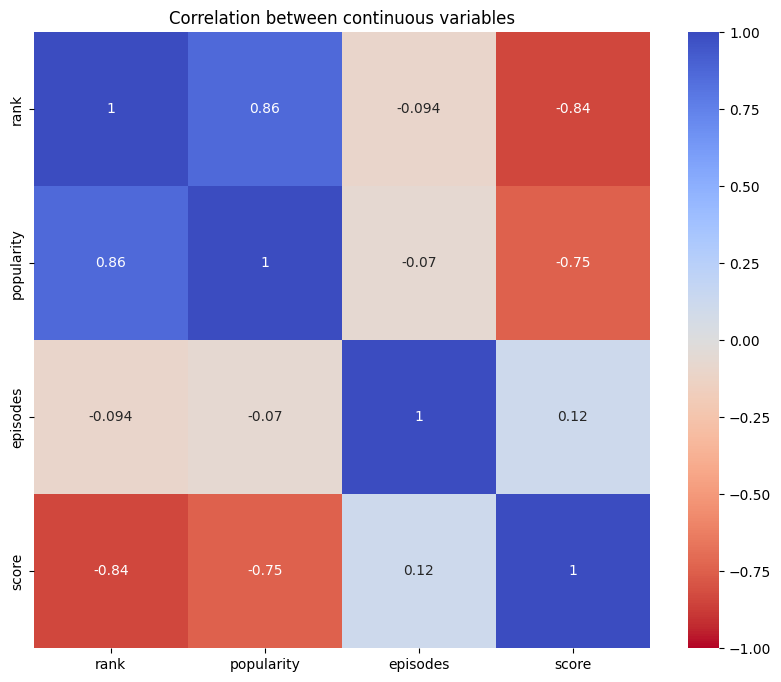

In [ ]:
df_corr = df_filtered[['rank', 'popularity','episodes','score']].corr()

# Set up the plotting environment
f,ax = plt.subplots(1,1,figsize=(10,8))

# Make a heatmap, masking the upper triangle
sb.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,ax=ax,cmap='coolwarm_r').set(title = "Correlation between continuous variables")
images_dir = '/content/drive/MyDrive/DS 2500/Final Project/results'
plt.savefig(f"{images_dir}/heatmap.jpg")

Apart from being relatively correlates with `score`, `rank` and `popularity` are also seems to have a strong correlation with each other. Let's see how the trend looks like.

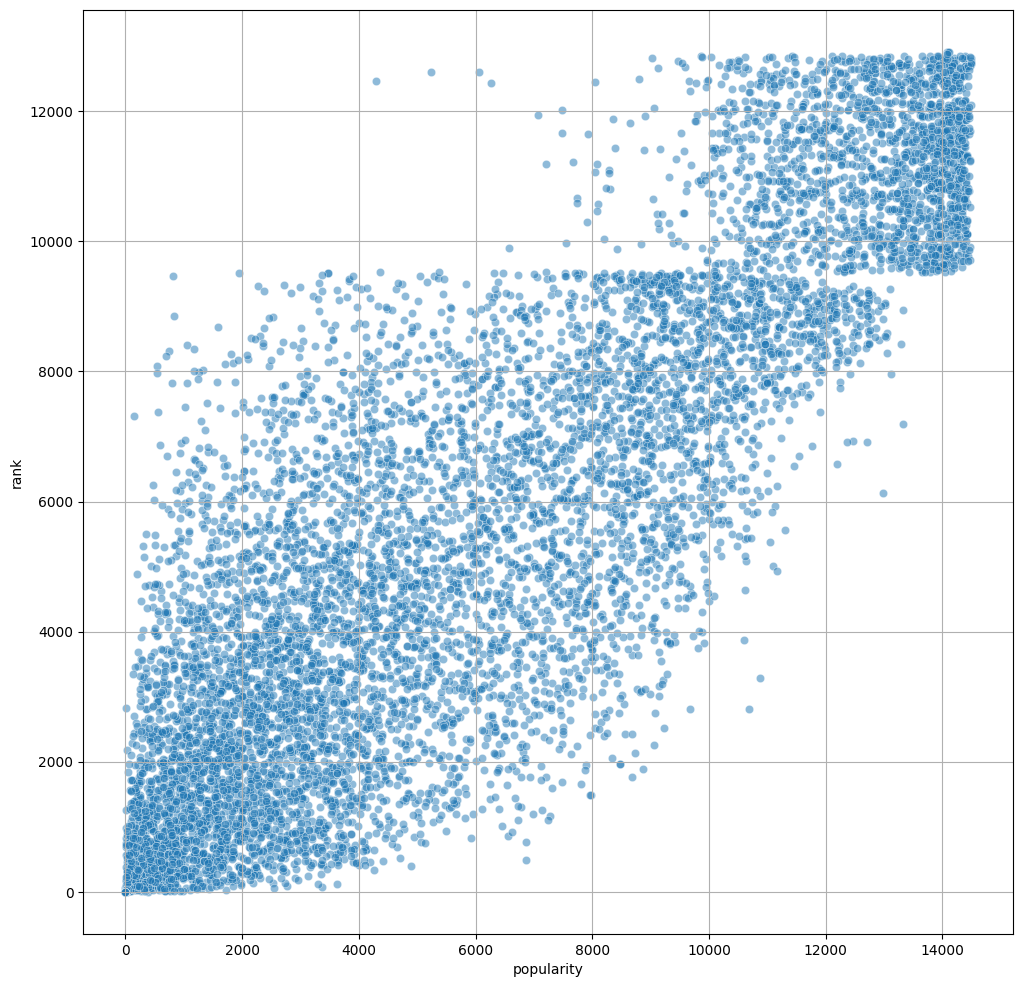

In [ ]:
# Set up the plotting environment
f,ax1 = plt.subplots(figsize =(12,12))
sb.scatterplot(x='popularity',y='rank',data=df_filtered, alpha = .5)
plt.grid()


Although `popularity` and `rank` seems to sparse out rather than concatinating to a line, there is still a visible linear trend correlation of these variables.

How does each variable correlates to the target variable visually?

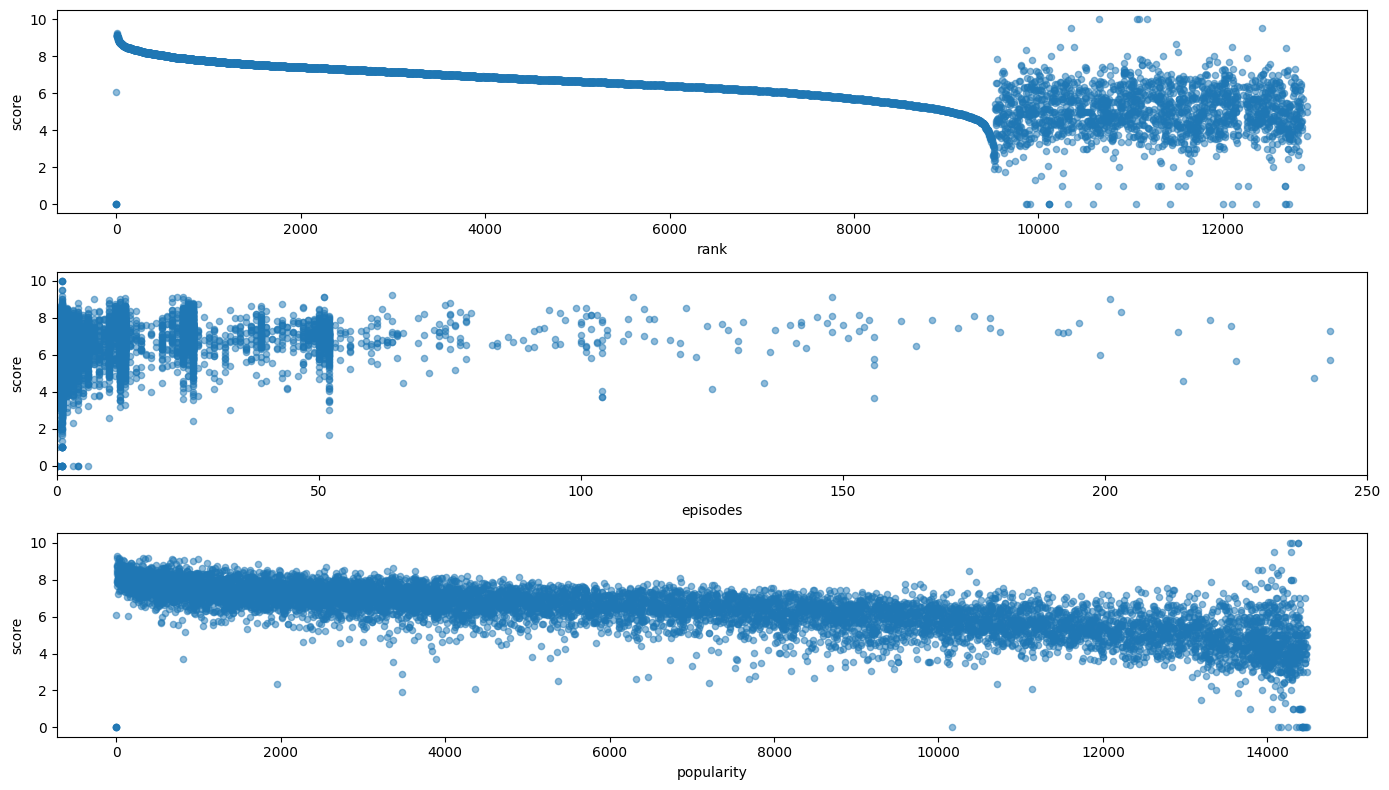

In [ ]:
# Like mentioned, we will have a look at how rank, episodes, popularity and source correlates with score
col1 = ['rank', 'episodes', 'popularity']

f,axs = plt.subplots(3,1,figsize=(14,8))
for i,ax in enumerate(axs.flatten()):
    # Plot the data
    df_filtered.plot.scatter(x=col1[i],y='score',ax=ax, alpha = .5)
ax = plt.subplot(3,1,2)

# Most animes are not really lengthy, so I will limit the episodes range for better visualization
ax.set_xlim(0,250)  
plt.tight_layout()


The clearest relationship would be `rank` and `score`, as rank gets lower, the score gets higher. Following that is the `popularity` relationship, while it is not concentrated, we can see a clear linear relationship here, similar to `episodes` with less concentration.

Categorical variables

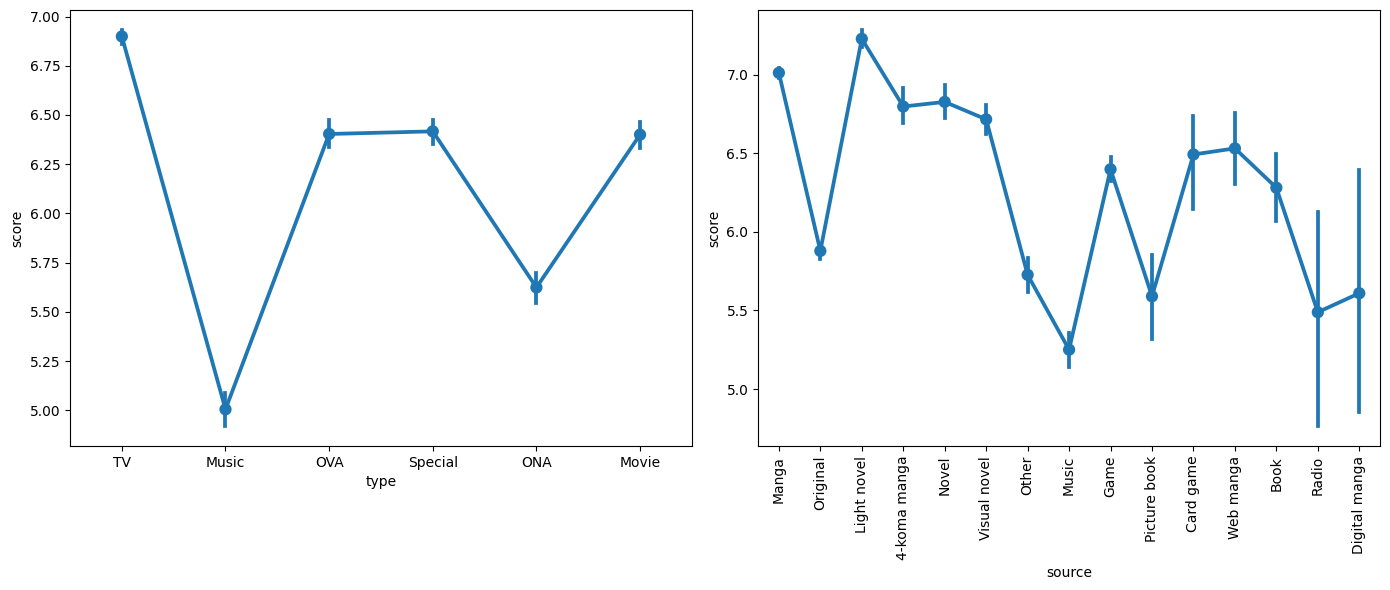

In [ ]:
col2 = ['type','source']

f,axs = plt.subplots(1,2,figsize=(14,6))
for i,ax in enumerate(axs.flatten()):
    # Plot the data
    sb.pointplot(x=col2[i],y='score',data=df_filtered,ax=ax)

ax2 = plt.subplot(1,2,2)
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()


## **4.7. Conclusion from EDA**

From EDA, we can have some conclusion:
- Apart from the goal we proposed, there is a strong correlation between `rank` and `popularity`.
- Although almost half of the anime list is original plot, people tend to prefer to watch animes originally from manga and light novel more.
- `rank` and `popularity` are strongly correlated and statistically significant with `score`, while `episodes` presents a weaker correlation, but its p-value implies that this correlation cannot be ignored.
- There is a strong correlation of which `type` and from which `source` to the output of the overall `score` of anime.

# **5. Inferential Analysis**

Apart from the correlation, how does the causal relationship behaves?

We concluded from EDA that there is a strong correlation between `rank` and `popularity`, which can be an auto-correlation problem when we build the model. To deal with this, I am using PCA, however, it is more complex compared to the ordinary approach. So in this part, I will compare the performance of these two approach, specifically, for each of these methods, I will build 2 models, and compared the performance based on R-squared, AIC, BIC values.

## **5.1. No auto-correlation solution**

Without categorical variables

In [ ]:
lm0 = smf.ols(formula = 'score ~ rank + popularity + episodes', data = df_filtered).fit()
lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     7341.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:19:50   Log-Likelihood:                -9188.5
No. Observations:                8980   AIC:                         1.839e+04
Df Residuals:                    8976   BIC:                         1.841e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0163      0.013    594.346      0.000       7.990       8.043
rank          -0.0003   3.74e-06    -68.030      0.000      -0.000      -0.000
popularity  -2.48e-05   3.13e-06     -7.927      0.000   -3.09e-05   -1.87e-05
episodes       0.0012      0.000      6.570      0.000       0.001       0.002
==============================================================================
Omnibus:                     3594.838   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           193525.684
Skew:                          -1.138   Prob(JB):                         0.00
Kurtosis:                      25.628   Cond. No.                     1.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Included categorical variables

In [ ]:
lm1 = smf.ols(formula = 'score ~ rank + popularity + episodes + C(type) + C(source)', data = df_filtered).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1075.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:19:50   Log-Likelihood:                -8951.2
No. Observations:                8980   AIC:                         1.795e+04
Df Residuals:                    8957   BIC:                         1.811e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.9855      0.050    160.826      0.000       7.888       8.083
C(type)[T.Music]              -0.5637      0.039    -14.432      0.000      -0.640      -0.487
C(type)[T.ONA]                -0.0917      0.029     -3.190      0.001      -0.148      -0.035
C(type)[T.OVA]                -0.0158      0.025     -0.639      0.523      -0.064       0.033
C(type)[T.Special]            -0.0376      0.025     -1.479      0.139      -0.087       0.012
C(type)[T.TV]                  0.0441      0.022      2.001      0.045       0.001       0.087
C(source)[T.Book]              0.1222      0.083      1.478      0.139      -0.040       0.284
C(source)[T.Card game]        -0.1375      0.099     -1.384      0.166      -0.332       0.057
C(source)[T.Digital manga]    -0.5514      0.253     -2.183      0.029      -1.046      -0.056
C(source)[T.Game]             -0.0451      0.053     -0.855      0.393      -0.149       0.058
C(source)[T.Light novel]      -0.0192      0.054     -0.357      0.721      -0.124       0.086
C(source)[T.Manga]             0.0378      0.047      0.810      0.418      -0.054       0.129
C(source)[T.Music]             0.1051      0.067      1.563      0.118      -0.027       0.237
C(source)[T.Novel]             0.0961      0.058      1.665      0.096      -0.017       0.209
C(source)[T.Original]         -0.1471      0.047     -3.125      0.002      -0.239      -0.055
C(source)[T.Other]            -0.0207      0.057     -0.365      0.715      -0.132       0.090
C(source)[T.Picture book]      0.1245      0.082      1.510      0.131      -0.037       0.286
C(source)[T.Radio]            -0.2434      0.224     -1.088      0.276      -0.682       0.195
C(source)[T.Visual novel]     -0.0579      0.058     -0.990      0.322      -0.172       0.057
C(source)[T.Web manga]         0.0307      0.072      0.426      0.670      -0.110       0.172
rank                          -0.0003   3.79e-06    -67.290      0.000      -0.000      -0.000
popularity                 -6.506e-06   3.41e-06     -1.906      0.057   -1.32e-05    1.85e-07
episodes                       0.0007      0.000      3.908      0.000       0.000       0.001
==============================================================================
Omnibus:                     4152.326   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           237716.237
Skew:                          -1.426   Prob(JB):                         0.00
Kurtosis:                      28.044   Cond. No.                     3.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79

## **5.2. Auto-correlation fixed**

There is a strong correlation between `rank` and `popularity`, which conflict with the assumptions of OLS model. Let's try fixing it.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_filtered[['rank','popularity']])

PCA()

In [ ]:
pca.explained_variance_ratio_

array([0.93276716, 0.06723284])

In [ ]:
# Transform the variables into PCA values using the PCA model
X_pca = pca.transform(df_filtered[['rank', 'popularity']])

In [ ]:
df_filtered['X_pca_0'] = X_pca[:,0]
df_filtered['X_pca_1'] = X_pca[:,1]
df_filtered.head()

,anime_id,title,source,type,rank,episodes,popularity,score,X_pca_0,X_pca_1
0,11013,Inu x Boku SS,Manga,TV,1274.0,12,231,7.63,-7553.518119,386.165754
1,2104,Seto no Hanayome,Manga,TV,727.0,26,366,7.89,-7794.064153,-123.315949
2,5262,Shugo Chara!! Doki,Manga,TV,1508.0,51,1173,7.55,-6675.173726,-26.909454
3,721,Princess Tutu,Original,TV,307.0,38,916,8.21,-7632.561703,-796.232703
4,12365,Bakuman. 3rd Season,Manga,TV,50.0,25,426,8.67,-8174.836473,-686.291473


No categorical variables

In [ ]:
# Estimate a model using only X_pca
m3 = smf.ols(formula = 'score ~ X_pca_0 + X_pca_1',data=df_filtered).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                 1.094e+04
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:19:50   Log-Likelihood:                -9210.0
No. Observations:                8980   AIC:                         1.843e+04
Df Residuals:                    8977   BIC:                         1.845e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4110      0.007    900.132      0.000       6.397       6.425
X_pca_0       -0.0002   1.27e-06   -142.701      0.000      -0.000      -0.000
X_pca_1       -0.0002   4.72e-06    -38.901      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     3572.629   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           192733.972
Skew:                          -1.126   Prob(JB):                         0.00
Kurtosis:                      25.584   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With categorical variables

In [ ]:
m4 = smf.ols(formula = 'score ~ X_pca_0 + X_pca_1 + episodes + C(type) + C(source)',data=df_filtered).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1075.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:19:51   Log-Likelihood:                -8951.2
No. Observations:                8980   AIC:                         1.795e+04
Df Residuals:                    8957   BIC:                         1.811e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      6.4811      0.048    133.851      0.000       6.386       6.576
C(type)[T.Music]              -0.5637      0.039    -14.432      0.000      -0.640      -0.487
C(type)[T.ONA]                -0.0917      0.029     -3.190      0.001      -0.148      -0.035
C(type)[T.OVA]                -0.0158      0.025     -0.639      0.523      -0.064       0.033
C(type)[T.Special]            -0.0376      0.025     -1.479      0.139      -0.087       0.012
C(type)[T.TV]                  0.0441      0.022      2.001      0.045       0.001       0.087
C(source)[T.Book]              0.1222      0.083      1.478      0.139      -0.040       0.284
C(source)[T.Card game]        -0.1375      0.099     -1.384      0.166      -0.332       0.057
C(source)[T.Digital manga]    -0.5514      0.253     -2.183      0.029      -1.046      -0.056
C(source)[T.Game]             -0.0451      0.053     -0.855      0.393      -0.149       0.058
C(source)[T.Light novel]      -0.0192      0.054     -0.357      0.721      -0.124       0.086
C(source)[T.Manga]             0.0378      0.047      0.810      0.418      -0.054       0.129
C(source)[T.Music]             0.1051      0.067      1.563      0.118      -0.027       0.237
C(source)[T.Novel]             0.0961      0.058      1.665      0.096      -0.017       0.209
C(source)[T.Original]         -0.1471      0.047     -3.125      0.002      -0.239      -0.055
C(source)[T.Other]            -0.0207      0.057     -0.365      0.715      -0.132       0.090
C(source)[T.Picture book]      0.1245      0.082      1.510      0.131      -0.037       0.286
C(source)[T.Radio]            -0.2434      0.224     -1.088      0.276      -0.682       0.195
C(source)[T.Visual novel]     -0.0579      0.058     -0.990      0.322      -0.172       0.057
C(source)[T.Web manga]         0.0307      0.072      0.426      0.670      -0.110       0.172
X_pca_0                       -0.0002   1.59e-06   -104.528      0.000      -0.000      -0.000
X_pca_1                       -0.0002   4.84e-06    -39.948      0.000      -0.000      -0.000
episodes                       0.0007      0.000      3.908      0.000       0.000       0.001
==============================================================================
Omnibus:                     4152.326   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           237716.237
Skew:                          -1.426   Prob(JB):                         0.00
Kurtosis:                      28.044   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09

## **5.3. Performance conclusion**

Based on R-squared, AIC, and BIC metrics for performance measurement:
- The performance is the same even if we dealt with correlation
- It is seen that the model that contains all variable we discussed gives a better performance, with regards to the decrease in AIC and BIC values and increase of R-squared value.

In conclusion, a model, with all analyzed variables as inputs has the best performance overall with 72.5% fit, and dealing with auto-correlation is unnecessary.

# **6. Conclusion**

- There is a strong correlation between each discussed variables with the output, `score`, except for `episodes`, where there is a weaker correlation, but the correlation cannot be ignored.

- By using OLS models, we can see that with the inputted variables, the output would fit 72.5% with the data, and that there is a 72.5% accuracy in term of causation effect.